In [27]:
import pkufiber as pf
import yaml 
import torch 
from scripts.train_eq import init_model, check_data_config, DataLoader, test_model

path = 'experiments/40G_3ch_ampbc_v2'
with open(path + '/config.yaml') as f: config = yaml.load(f, Loader=yaml.FullLoader)
param_dict = torch.load(path + '/models/60.pth', map_location='cpu')['model_param']

model = init_model(config['model_name'], config['model_info'])
model.load_state_dict(param_dict) 

test_path =  "/home/xiaoxinyu/TorchFiber/dataset/test.h5" 

data = pf.data.PbcDataset(path=test_path, Nmodes=2, Nch=3, Rs=80, Pch=-1, 
                window_size=model.M,  num_symb=100000, truncate=20000)

dataloader = DataLoader(data, batch_size=20000, shuffle=False)

test_model(model, dataloader, device='cpu')

FileNotFoundError: [Errno 2] No such file or directory: 'experiments/40G_3ch_ampbc_v2/config.yaml'

In [2]:
id_model = pf.dsp.nonlinear_compensation.nneq.EqID(M=41)
test_model(id_model, dataloader, device='cpu')

{'MSE': 0.02908763475716114,
 'SNR': 15.35193654699853,
 'BER': 0.0033076002262532713,
 'Qsq': 8.677376664408975}

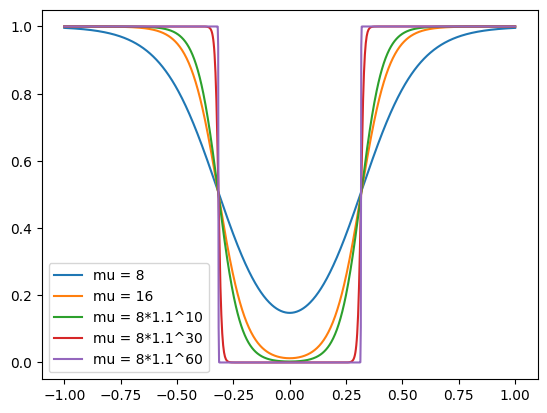

In [25]:
import pkufiber as pf
import pkufiber.dsp.nonlinear_compensation.loss as loss 
import torch 
import matplotlib.pyplot as plt

x = torch.linspace(-1,1,1000)


y_ber = loss.well(x, mu=8*1.1**100)

y1 = loss.well(x, mu=8)
y2 = loss.well(x, mu=16)
y3 = loss.well(x, mu=8*1.1**10)
y4 = loss.well(x, mu=8*1.1**30)
y5 = loss.well(x, mu=8*1.1**60)


# plt.plot(x, y_ber, label='BER')
plt.plot(x, y1, label='mu = 8')
plt.plot(x, y2, label='mu = 16')
plt.plot(x, y3, label='mu = 8*1.1^10')
plt.plot(x, y4, label='mu = 8*1.1^30')
plt.plot(x, y5, label='mu = 8*1.1^60')
plt.legend()

In [26]:
4.818 / 60

0.0803